In [1]:
code117_155_a = [10] * 8 + [12, 10] + [12] * 5 + [14, 14, 12, 14, 14, 14, 14]
code117_155_k = range(7, 29)

frame_error_rate117_155 = []
frame_error_prob117_155 = []
import numpy as np
import math
import scipy.special
import matplotlib.pyplot as plt
font = {
    'family':'monospace',
    'size':21,
    'weight': 'semibold'}
plt.rc('font', **font)

In [2]:
answ117_155, ansn117_155 = [{7: np.array([ 10]),
  8: np.array([ 10]),
  9: np.array([ 10, 12]),
  10: np.array([ 10, 12, 14]),
  11: np.array([10, 12, 14, 16]),
  12: np.array([10, 12, 14, 16]),
  13: np.array([10, 12, 14, 16, 18, 22]),
  14: np.array([10, 12, 14, 16, 18, 20]),
  15: np.array([12, 14, 16, 18, 20, 22, 24]),
  16: np.array([10, 12, 14, 16, 18, 20, 22, 24]),
  17: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  18: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  19: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  20: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  21: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  22: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  23: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
  24: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]),
  25: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])},
 {7: np.array([1]),
  8: np.array([1]),
  9: np.array([1, 1]),
  10: np.array([ 2, 1, 1]),
  11: np.array([ 2, 1, 4, 1]),
  12: np.array([ 1, 5, 3, 7]),
  13: np.array([ 1,  4, 11, 12,  3,  1]),
  14: np.array([ 1,  4, 16, 22, 15,  6]),
  15: np.array([ 5, 18, 45, 34, 20,  4,  1]),
  16: np.array([ 1,  4, 19, 65, 79, 59, 21,  5]),
  17: np.array([  5,  18,  90, 144, 136,  88,  18,   4,   1]),
  18: np.array([  2,  22, 110, 221, 299, 226,  98,  21,   5]),
  19: np.array([  2,  19, 123, 318, 555, 522, 323, 116,  18,   3,   1]),
  20: np.array([   2,   16,  130,  423,  860, 1165,  816,  433,  111,   25,    3]),
  21: np.array([   1,   16,  122,  517, 1300, 2065, 1999, 1255,  523,  113,   23,
            2]),
  22: np.array([   7,  129,  598, 1753, 3382, 4182, 3334, 1705,  567,  127,   24]),
  23: np.array([  12,  108,  609, 2262, 5253, 7591, 7662, 5043, 2187,  613,  133,
           15,    1]),
  24: np.array([    1,     3,    90,   661,  2681,  7323, 12986, 15684, 12812,
          7054,  2623,   675,   118,    13,     1]),
  25: np.array([    5,    77,   637,  2962,  9845, 20250, 29100, 29072, 19780,
          9460,  2927,   702,   121,     8])}]

In [3]:
p_array = [0.003, 0.005, 0.006, 0.008, 0.01]

BER_real = []
code_array = ['117_155']

for code in code_array:
    ber_code = []
    for p in p_array:
        fansrd = open('results/num_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')
        fwghrd = open('results/wgh_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')

        all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]

        line = fansrd.readline()
        dict_num = dict(zip(range(10000), np.zeros(10000)))
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_num[i] = j
            line = fansrd.readline()

        dict_wgh = dict(zip(range(10000), np.zeros(10000)))
        line = fwghrd.readline()
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_wgh[i] = j
            line = fwghrd.readline()
            
        dict_wgh[3] += 1
        ber_code.append((np.array(list(dict_wgh.values()))*np.array(list(dict_num.values()))).sum()/2000/all_count1315rd)
    BER_real.append(ber_code)

In [4]:
p_array = [0.02, 0.03, 0.05, 0.09]

code_array = ['117_155']

for code in code_array:
    ber_code = []
    for p in p_array:
        fansrd = open('results/num_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')
        fwghrd = open('results/wgh_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')

        all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]

        line = fansrd.readline()
        dict_num = dict(zip(range(1000), np.zeros(1000)))
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_num[i] = j
            line = fansrd.readline()

        dict_wgh = dict(zip(range(1000), np.zeros(1000)))
        line = fwghrd.readline()
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_wgh[i] = j
            line = fwghrd.readline()
            
        dict_wgh[3] += 1
        ber_code.append((np.array(list(dict_wgh.values()))*np.array(list(dict_num.values()))).sum()/2000/all_count1315rd)
    BER_real.append(ber_code)

In [5]:
p_array = [0.003, 0.005, 0.006, 0.008, 0.01, 0.02, 0.03, 0.05, 0.09]

In [17]:
# def idea_up(a,k,p):
#     pro = 0
#     d = int(a/2) + 1
    
#     for i in range(d, 2*k+1):
#         for i1 in range(d, min(a,i)+1):
#             pro += pow(p, i)*pow(1-p, 2*k-i)*scipy.special.binom(a, i1)*scipy.special.binom(2*k-a, i-i1)
#     if(a%2==0):
#         d = int(a/2)
#         for i in range(d, 2*k+1-d):
#             pro += 1/2*pow(p, i)*pow(1-p, 2*k-i)*scipy.special.binom(a, d)*scipy.special.binom(2*k-a, i-d)
        
#     return pro
# def idea(a,k,p):
#     pro = 0
#     d = int(a/2) + 1
    
#     for i in range(d, 2*k+1):
#         for i1 in range(d, min(a,i)+1):
#             pro += pow(p, i)*pow(1-p, 2*k-i+2*12)*scipy.special.binom(a, i1)*scipy.special.binom(2*k-a, i-i1)
#     if(a%2==0):
#         d = int(a/2)
#         for i in range(d, 2*k+1-d): #2*k+1-d
#             pro += 1/2*pow(p, i)*pow(1-p, 2*k-i+2*12)*scipy.special.binom(a, d)*scipy.special.binom(2*k-a, i-d)
        
#     return pro

In [13]:
from estimates import low_burst, up_burst

In [7]:
m=6

In [8]:
max_weights_117_155 = []
for key in answ117_155.keys():
    max_weights_117_155.append(max(answ117_155[key]))

In [9]:
ber_upper_117_155 = []
ber_lower_117_155 = []
p_array_ = [0.21, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
for p in p_array_:
    i117_155 = []
    cor117_155 = []
    for i in range(0,len(code117_155_a)):
        i117_155.append(low_burst(code117_155_a[i], code117_155_k[i], p, m))

    iapp_y117_155 = [0]*19

    for i in range(7,23):
        for j,elem in enumerate(answ117_155[i]):
            iapp_y117_155[i-4] += ansn117_155[i][j]*up_burst(elem,i,p, m)
    ber_upper_117_155.append((np.array(max_weights_117_155) * np.array(iapp_y117_155)).sum()/2)
    ber_lower_117_155.append((np.array(code117_155_a) * np.array(i117_155))[0]*9/2)

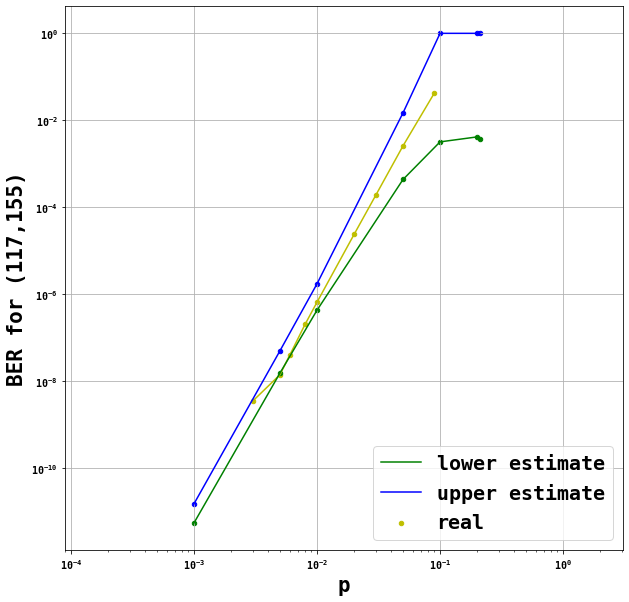

In [10]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')

plt.scatter(p_array, np.hstack(BER_real),color='y',s=20, alpha=1, label = 'real')
plt.plot(p_array, np.hstack(BER_real),color='y', alpha=1)

plt.plot(p_array_, ber_lower_117_155,color='g', alpha=1, label = 'lower estimate')
plt.scatter(p_array_, ber_lower_117_155,color='g',s=20, alpha=1)

plt.plot(p_array_, [min(1, elem) for elem in ber_upper_117_155],color='blue', alpha=1, label = 'upper estimate')
plt.scatter(p_array_, [min(1, elem) for elem in ber_upper_117_155],color='blue',s=20, alpha=1)
plt.grid()
plt.xlabel('p', **font)
plt.ylabel('BER for (117,155)', **font)
plt.legend(loc=4, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
plt.savefig('ber117_155.png', dpi = 150)

In [18]:
code = ['117_155']
p_array = [0.004, 0.005, 0.006, 0.008, 0.01] #, 0.02, 0.03, 0.05, 0.09
real_burst = []
lens = []
low_burst_ = []
up_burst_ = []
for p in p_array:
    i117_155 = []
    cor117_155 = []
    for i in range(0,len(code117_155_a)):
        i117_155.append(low_burst(code117_155_a[i], code117_155_k[i], p, m))
    low_burst_.append(i117_155)
    
    iapp_y117_155 = [0]*22

    for i in range(7,26):
        for j,elem in enumerate(answ117_155[i]):
            iapp_y117_155[i-7] += ansn117_155[i][j]*up_burst(elem,i,p, m)
    up_burst_.append(iapp_y117_155)
    
    fansrd = open('results/num_rd'+code[0]+'_' + str(p)[2:] +'_ber1.dat', 'r')
    fwghrd = open('results/wgh_rd'+code[0]+'_' + str(p)[2:] +'_ber1.dat', 'r')
    all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]
    line = fansrd.readline()
    dict_num = dict(zip(range(100), np.zeros(100)))
    while(line):
        arr = line.split(' ')
        i,j = int(arr[0]), float(arr[1][:-1])
        dict_num[i] = j
        line = fansrd.readline()
#     print(dict_num)
    dict_num[7] += dict_num[6] 
    dict_num[6] = 0

    code117_155_len = []
    dict_wgh = dict(zip(range(100), np.zeros(100)))
    line = fwghrd.readline()
    while(line):
        arr = line.split(' ')
        i,j = int(arr[0]), float(arr[1][:-1])
        dict_wgh[i] = j
        line = fwghrd.readline()

    code1315_len = []
    prob1315rd = []
    for leng in dict_num:
        if(dict_num[leng] != 0):
            code117_155_len.append(leng)
            prob1315rd.append(dict_num[leng]/(all_count1315rd)/(1000-i-4))
    lens.append(code117_155_len)
    real_burst.append(prob1315rd)

In [19]:
code = ['117_155']
p_array = [0.02, 0.03, 0.05, 0.09] #, 0.02, 0.03, 0.05, 0.09
real_burst = []
lens = []
low_burst_ = []
up_burst_ = []
for p in p_array:
    i117_155 = []
    cor117_155 = []
    for i in range(0,len(code117_155_a)):
        i117_155.append(low_burst(code117_155_a[i], code117_155_k[i], p, m))
    low_burst_.append(i117_155)
    
    iapp_y117_155 = [0]*22

    for i in range(7,26):
        for j,elem in enumerate(answ117_155[i]):
            iapp_y117_155[i-7] += ansn117_155[i][j]*up_burst(elem,i,p, m)
    up_burst_.append(iapp_y117_155)
    
    fansrd = open('results/num_rd'+code[0]+'_' + str(p)[2:] +'_ber1.dat', 'r')
    fwghrd = open('results/wgh_rd'+code[0]+'_' + str(p)[2:] +'_ber1.dat', 'r')
    all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]
    line = fansrd.readline()
    dict_num = dict(zip(range(1000), np.zeros(1000)))
    while(line):
        arr = line.split(' ')
        i,j = int(arr[0]), float(arr[1][:-1])
        dict_num[i] = j
        line = fansrd.readline()
#     print(dict_num)
    dict_num[7] += dict_num[6] 
    dict_num[6] = 0

    code117_155_len = []
    dict_wgh = dict(zip(range(1000), np.zeros(1000)))
    line = fwghrd.readline()
    while(line):
        arr = line.split(' ')
        i,j = int(arr[0]), float(arr[1][:-1])
        dict_wgh[i] = j
        line = fwghrd.readline()

    code1315_len = []
    prob1315rd = []
    for leng in dict_num:
        if(dict_num[leng] != 0):
            code117_155_len.append(leng)
            prob1315rd.append(dict_num[leng]/(all_count1315rd)/(1000-i-4))
    lens.append(code117_155_len)
    real_burst.append(prob1315rd)

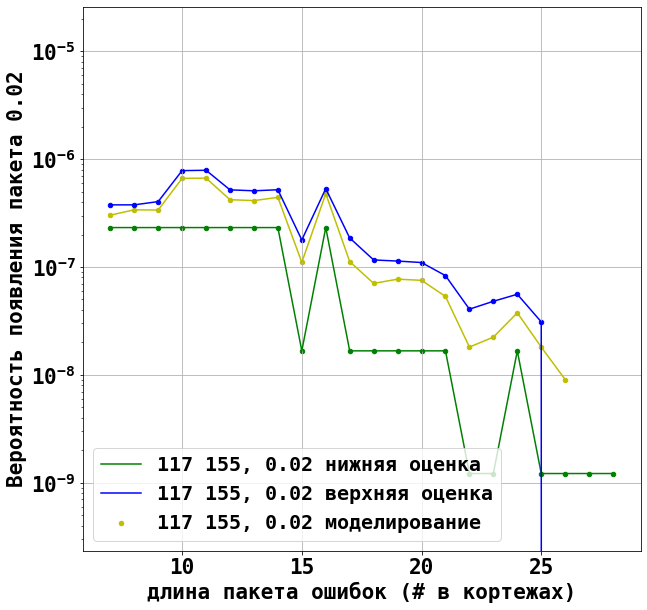

In [21]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')

# plt.scatter(code1315_k, prob1315,color='r',s=20, alpha=1, label = '13 15, p=0.03 simulation (zero word)')
# plt.plot(code1315_k, prob1315,color='r', alpha=1)
i = 0
plt.scatter(lens[i][:20], real_burst[i][:20],color='y',s=20, alpha=1, label = '117 155, ' + str(p_array[i]) +' моделирование')
plt.plot(lens[i][:20], real_burst[i][:20],color='y', alpha=1)

plt.plot(code117_155_k, low_burst_[i],color='g', alpha=1, label = '117 155, ' + str(p_array[i]) +' нижняя оценка')
plt.scatter(code117_155_k, low_burst_[i],color='g',s=20, alpha=1)
# plt.plot(code1315_k, y1315,color='g', alpha=1, label = '13 15, p=0.03 theory')
# plt.scatter(code1315_k, y1315,color='g',s=20, alpha=1)

plt.plot(code117_155_k, up_burst_[i],color='blue', alpha=1, label = '117 155, ' + str(p_array[i]) +' верхняя оценка')
plt.scatter(code117_155_k, up_burst_[i],color='blue',s=20, alpha=1)

# plt.plot(code1315_k, app_y1315,color='blue', alpha=1, label = '13 15, p=0.03 theory spector')
# plt.scatter(code1315_k, app_y1315,color='blue',s=20, alpha=1)
#plt.plot(range(4,15), geom1315_01,color='b', ls='--', alpha=1, label = 'geometrical distribution')
plt.grid()
plt.xticks(**font)
plt.yticks(**font)
plt.xlabel(u'длина пакета ошибок (# в кортежах)', **font)
plt.ylabel(u'Вероятность появления пакета ' + str(p_array[i]), **font)
plt.legend(loc=3, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
# plt.savefig('rdsimth1315_004_rus.png', dpi = 150)